# Analysis of BP data from MIMIC
- Ruoyi Jiang
- July 18, 2019
- Analysis of BP data from MIMIC

In [32]:
library(dplyr)
library(tidyr)
library(ggplot2)

### Read-in DF

In [4]:
vitals_df <- read.csv('/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/out/vitals.csv')

### Get distribution of time courses

In [43]:
vitals_df %>% dim()

[1] 9160700      11

In [7]:
vitals_df %>% head()

X,icustay_id,charttime,heartrate,sysbp,diasbp,meanbp,resprate,tempc,spo2,glucose
<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,200001,2181-11-25 19:06:00,115,NA,NA,NA,NA,NA,NA,NA
1,200001,2181-11-25 19:07:00,NA,NA,NA,NA,22,NA,NA,NA
2,200001,2181-11-25 19:08:00,NA,113,65,77,NA,NA,NA,NA
3,200001,2181-11-25 19:14:00,NA,NA,NA,NA,NA,NA,94,NA
4,200001,2181-11-25 19:16:00,114,NA,NA,NA,26,37.27778,95,NA
5,200001,2181-11-25 20:00:00,113,110,65,76,20,NA,97,NA


In [80]:
# This takes ~1 hr to run
length_stay_df <- vitals_df %>%
    group_by(icustay_id) %>%
    summarize(
        START = min(as.POSIXct(charttime, format="%Y-%m-%d %H:%M:%OS")),
        END = max(as.POSIXct(charttime, format="%Y-%m-%d %H:%M:%OS")),
        DIFF = 
              difftime(max(as.POSIXct(charttime, format="%Y-%m-%d %H:%M:%OS")), 
                min(as.POSIXct(charttime, format="%Y-%m-%d %H:%M:%OS")), units="hours")) 

In [81]:
length_stay_df %>%
    write.csv('/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/out/length_stay.csv')

### Plot histograms

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 653 rows containing non-finite values (stat_bin).”Warning message:
“Removed 653 rows containing non-finite values (stat_density).”

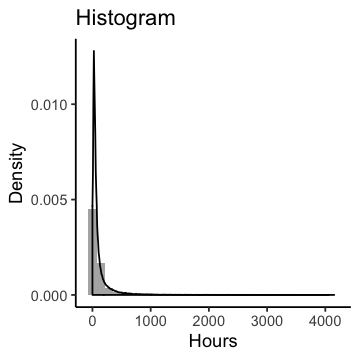

In [72]:
options(repr.plot.width=3, repr.plot.height=3)
length_stay_df %>%
    ggplot(aes(x=DIFF)) +
        geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
        geom_density(alpha=0.6)+
        scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        labs(title="Histogram",x="Hours", y = "Density")+
        theme_classic()

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


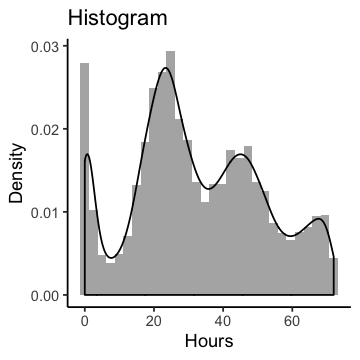

In [73]:
options(repr.plot.width=3, repr.plot.height=3)
length_stay_df %>%
    filter(DIFF < 72) %>%
    ggplot(aes(x=DIFF)) +
        geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
        geom_density(alpha=0.6)+
        scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        labs(title="Histogram",x="Hours", y = "Density")+
        theme_classic()

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


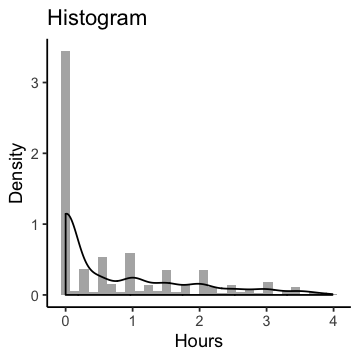

In [74]:
options(repr.plot.width=3, repr.plot.height=3)
length_stay_df %>%
    filter(DIFF < 4) %>%
    ggplot(aes(x=DIFF)) +
        geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
        geom_density(alpha=0.6)+
        scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        labs(title="Histogram",x="Hours", y = "Density")+
        theme_classic()

In [76]:
length_stay_df %>%
    ungroup() %>%
    drop_na(DIFF) %>%
    rowwise() %>%
    mutate(INTERVAL = if(DIFF < 4){"less than 4 hrs"}else{if(DIFF < 24){"between 4 and 24 hrs"}else{"more than 24 hrs"}}) %>%
    group_by(INTERVAL) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    mutate(FREQ = COUNT/sum(COUNT))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

INTERVAL,COUNT,FREQ
<chr>,<int>,<dbl>
between 4 and 24 hrs,10289,0.17242593
less than 4 hrs,3681,0.06168722
more than 24 hrs,45702,0.76588685
